In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import manifold, datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


def standerdize(data):
    mean = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mean) / std


def getpca(k,data,get_eig = False):
    data = standerdize(data)
    cov = np.cov(data.T)
    eig_vals , eig_vecs = np.linalg.eig(cov)
    eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key = lambda k:k[0] , reverse = True)
    mat = np.hstack([eig_pairs[i][1][:,np.newaxis] for i in range(k)])
    if get_eig == True:
        return eigen_vals , data.dot(mat)
    return data.dot(mat)


def getlda(k,data,datalabels):
    labels = np.unique(datalabels)
    data = standerdize(data)
    mean_vecs = []
    mean_labels = []
    for label in labels:
        mean_vecs.append(np.mean(data[datalabels==label] , axis=0))
        mean_labels.append(label)
    d = data.shape[1]
    S_W = np.zeros((d,d))
    for label,mv in zip(labels,mean_vecs):
        class_scatter = np.zeros((d,d))
        for row in data[datalabels==label]:
            row, mv = row.reshape(d, 1), mv.reshape(d, 1)
            class_scatter += (row-mv).dot((row-mv).T)
        S_W += class_scatter
    """for label,mv in zip(range(1, 4), mean_vecs):
        class_scatter = np.cov(X_train_std[y_train==label].T)
        S_W += class_scatter"""
    mean_overall = np.mean(data, axis=0)
    mean_overall = mean_overall.reshape(d,1)
    S_B = np.zeros((d, d))
    for label, mean_vec in zip(mean_labels,mean_vecs):
        n = data[datalabels == label].shape[0]
        mean_vec = mean_vec.reshape(d,1)
        S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W) @ (S_B))
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
    mat = np.hstack([eigen_pairs[i][1][:,np.newaxis] for i in range(k)])
    return data.dot(mat)

In [11]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

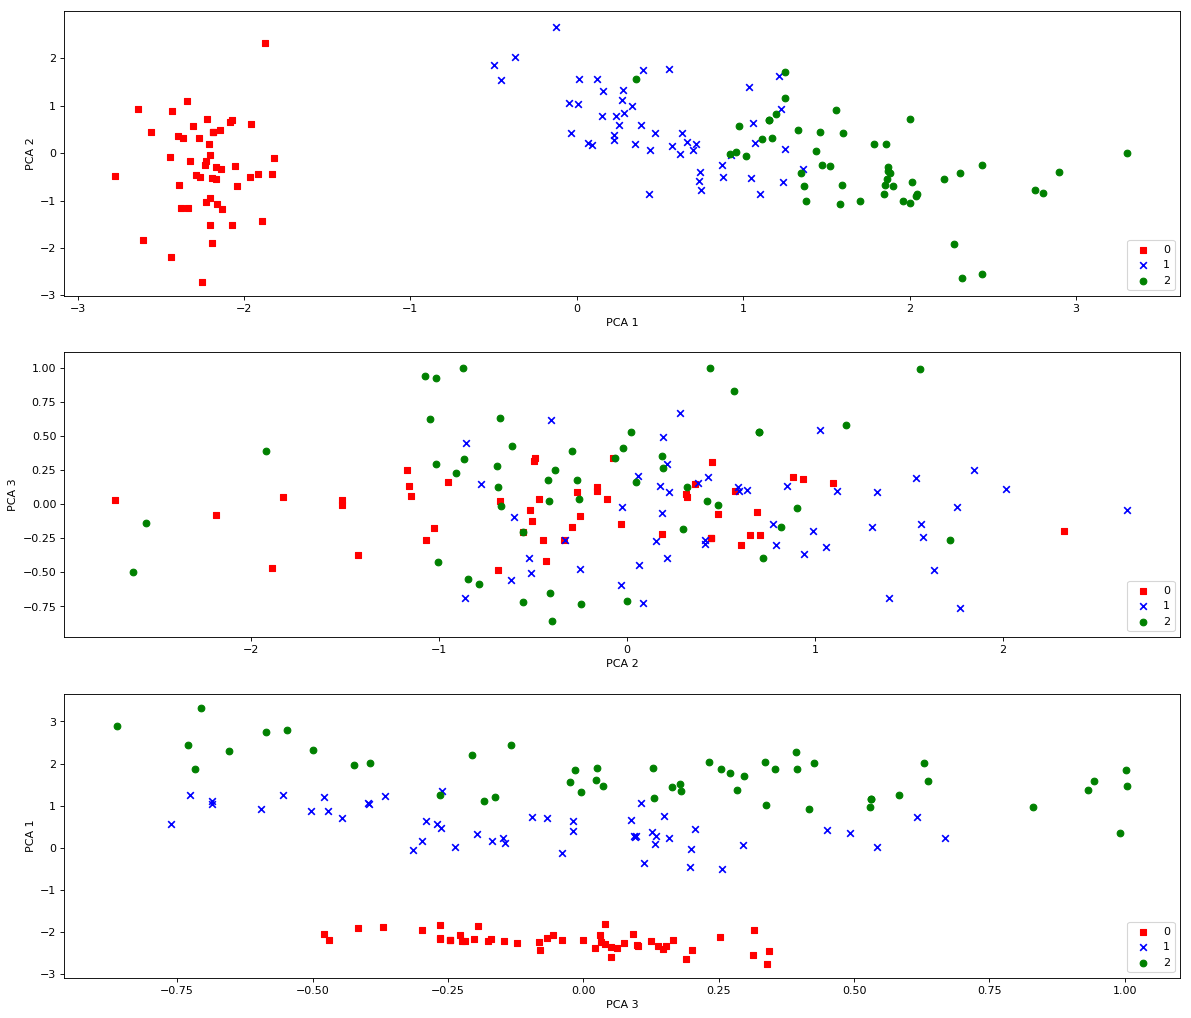

In [12]:
X_pca = getpca(3,X)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(311)
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_pca[y==l, 0],
    X_pca[y==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='lower right')

ax = fig.add_subplot(312)
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_pca[y==l, 1],
    X_pca[y==l, 2],
    c=c, label=l, marker=m)
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.legend(loc='lower right')

ax = fig.add_subplot(313)
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_pca[y==l, 2],
    X_pca[y==l, 0],
    c=c, label=l, marker=m)
plt.xlabel('PCA 3')
plt.ylabel('PCA 1')
plt.legend(loc='lower right')

plt.show()

c:\program files\python36\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


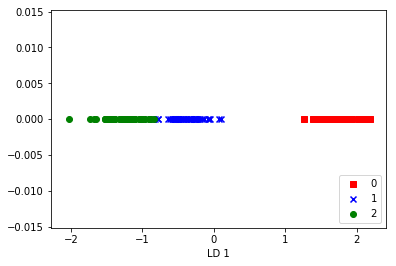

In [13]:
X_lda = getlda(3,X,y)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_lda[y==l, 0],
    np.zeros((len(X_lda[y==l, 0]))),
    c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.legend(loc='lower right')
plt.show()

In [24]:
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.data",sep = ' ',header = None)
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.labels",sep = ' ',header = None)
colors = ['r', 'b']
markers = ['s', 'x']
X_true = X
X = X.values[0: , 0:-1]
yi = np.squeeze(y,axis=1)

In [25]:
u , s, vh = np.linalg.svd(X.T)
print(u.shape)
print(s.shape)
print(vh.shape)

(10000, 10000)
(100,)
(100, 100)


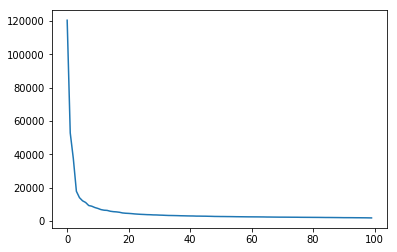

In [26]:
#for i , eig in enumerate(s):
plt.plot(s)
plt.show()

In [60]:
total_var = np.sum(s)
curr = 0
comp = 0.85
for index,i in enumerate(s):
    curr += i
    if (curr/total_var) >= comp:
        print('No of Components required for getting %.2f variances are : %d' % ( comp , index + 1))
        if(comp >= .99): break
        if(comp >= .95): comp += .04
        elif (comp<=.95): comp += .05

No of Components required for getting 0.85 variances are : 61
No of Components required for getting 0.90 variances are : 73
No of Components required for getting 0.95 variances are : 86
No of Components required for getting 0.99 variances are : 97


In [28]:
#Project in 2d pca space
Y = u.T[:2,:] @ X.T
Y = Y.T

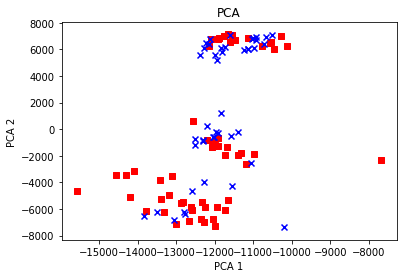

In [29]:
for l, c, m in zip(np.unique(y), colors, markers):
    #for p1 , p2 in Y:
    plt.scatter(Y[yi==l, 0],Y[yi==l, 1],c=c, label=l, marker=m)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("PCA")
plt.show()

In [4]:
X_train = X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
y_train = yi
mean_vecs = []
for label in (-1,1):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[-1]))

MV -1: [ 0.01826316 -0.07260562 -0.08759135 ...  0.10917872  0.14287841
 -0.23572886]

MV 1: [-0.02324402  0.09240716  0.1114799  ... -0.13895474 -0.18184525
  0.30001855]



In [5]:
d = 10000 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 10000x10000


In [6]:
mean_overall = np.mean(X_train_std, axis=0)
d = 10000 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 10000x10000


In [7]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

In [46]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)

w = eigen_pairs[0][1][:,np.newaxis]
X_train_lda = X_train_std.dot(w)

c:\program files\python36\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


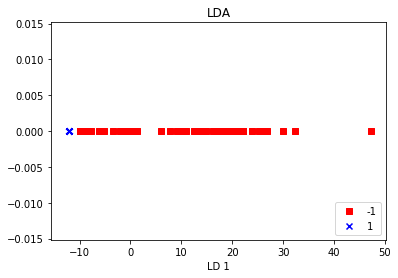

In [48]:
colors = ['r', 'b']
markers = ['s', 'x']
for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0],
    np.zeros((len(X_train_lda[y_train==l, 0]))),
    c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.legend(loc='lower right')
plt.title("LDA")
plt.show()

Done. Reconstruction error: 5.746e-08


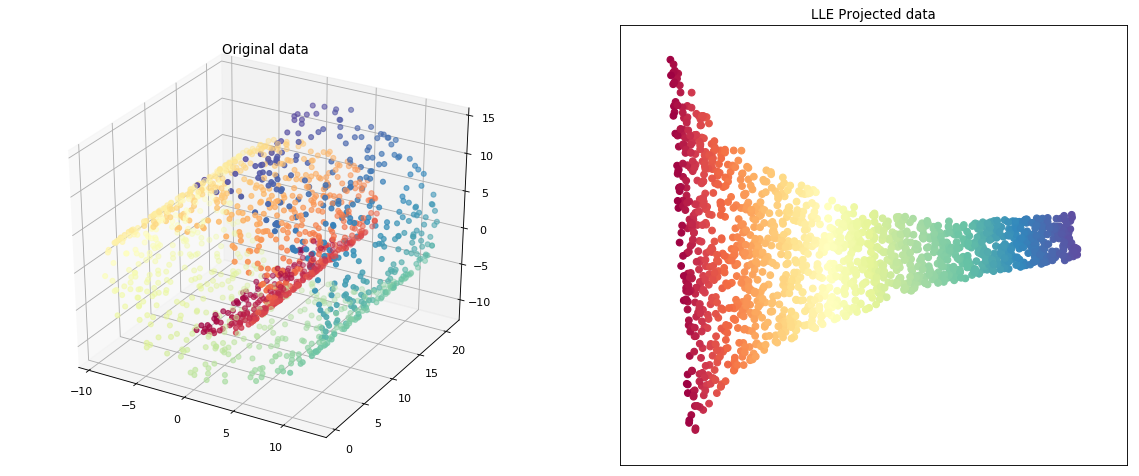

In [61]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('LLE Projected data')
plt.show()

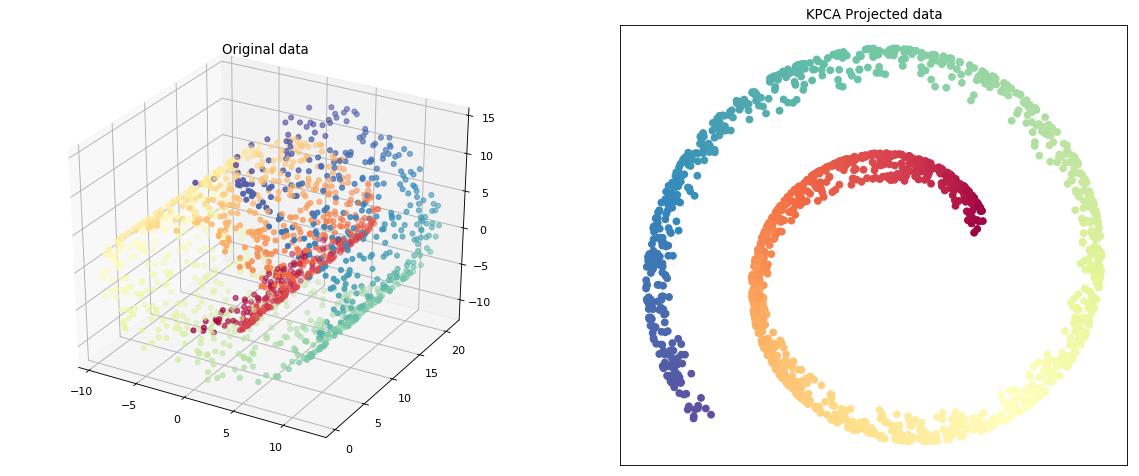

In [95]:
kpca = KernelPCA(n_components=2,kernel="rbf", fit_inverse_transform=True , gamma = 0.001)
X_kpca = kpca.fit_transform(X)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('KPCA Projected data')
plt.show()

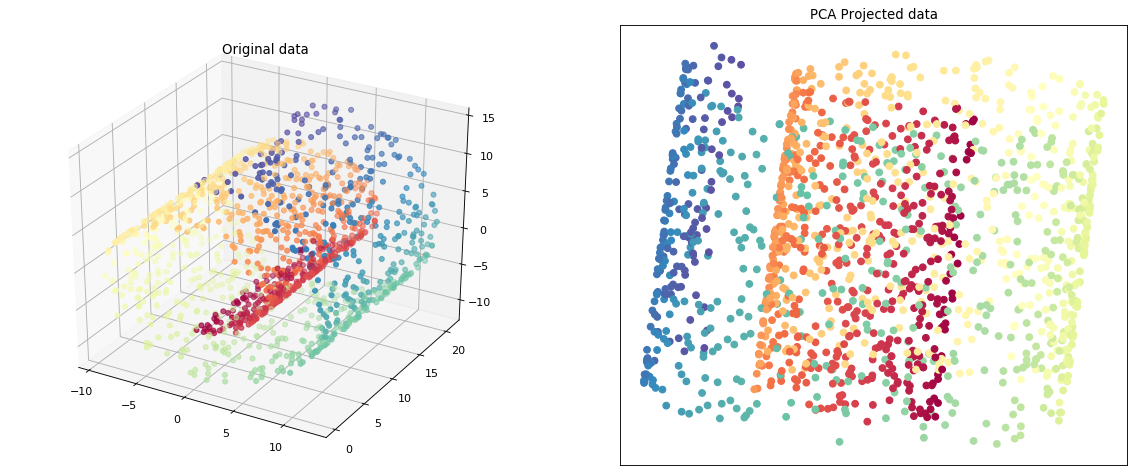

In [66]:
X_pca = getpca(2,X)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('PCA Projected data')
plt.show()

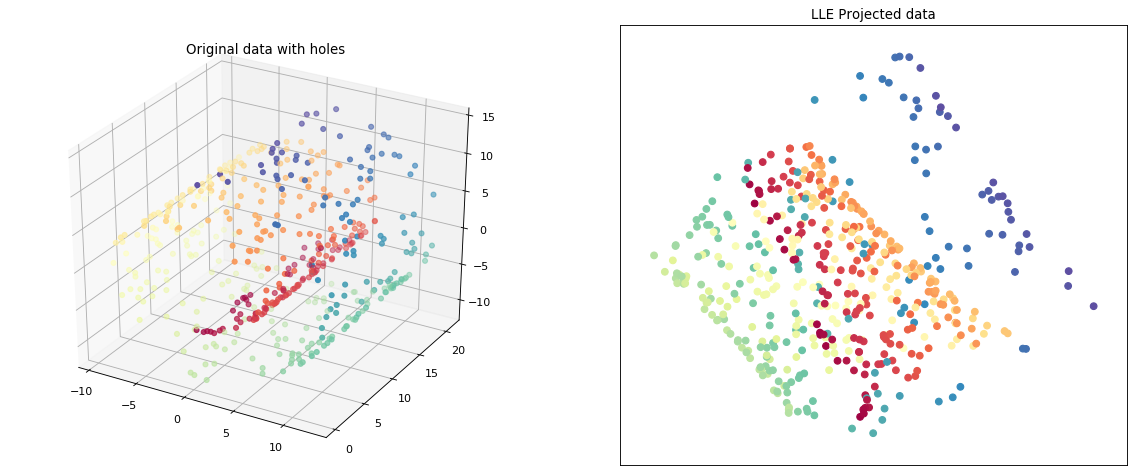

In [63]:
X_hole , c_hole = np.vstack((X[0:200],X[500:600],X[1000:1100],X[1400:1500])) , np.hstack((color[0:200],color[500:600],color[1000:1100],color[1400:1500]))
X_r, err = manifold.locally_linear_embedding(X_hole, n_neighbors=20,n_components=2)

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_hole[:, 0], X_hole[:, 1], X_hole[:, 2], c=c_hole, cmap=plt.cm.Spectral)

ax.set_title("Original data with holes")
ax = fig.add_subplot(222)
ax.scatter(X_r[:, 0], X_r[:, 1], c=c_hole, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('LLE Projected data')
plt.show()

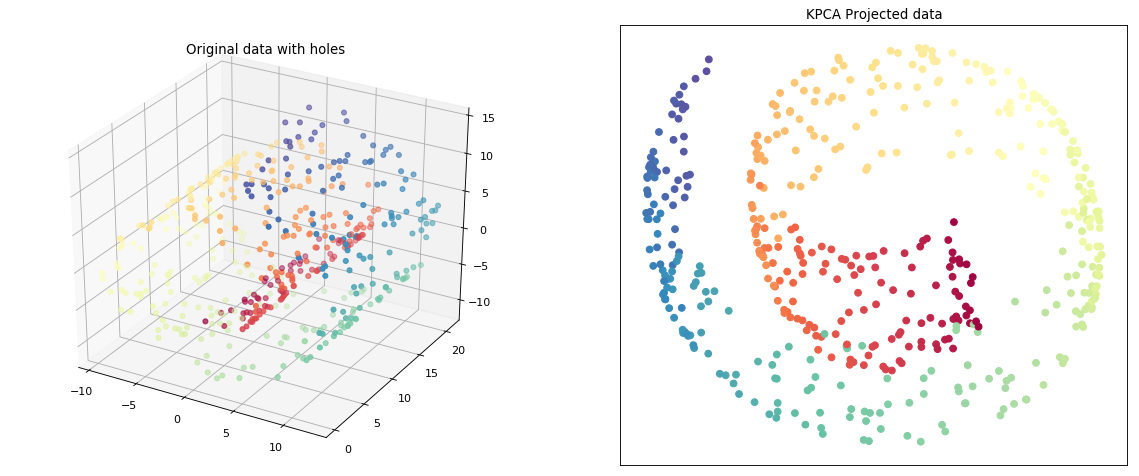

In [101]:
kpca = KernelPCA(n_components=2,kernel="rbf", fit_inverse_transform=True,gamma = 0.001)
X_kpca = kpca.fit_transform(X_hole)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_hole[:, 0], X_hole[:, 1], X_hole[:, 2], c=c_hole, cmap=plt.cm.Spectral)

ax.set_title("Original data with holes")
ax = fig.add_subplot(222)
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=c_hole, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('KPCA Projected data')
plt.show()

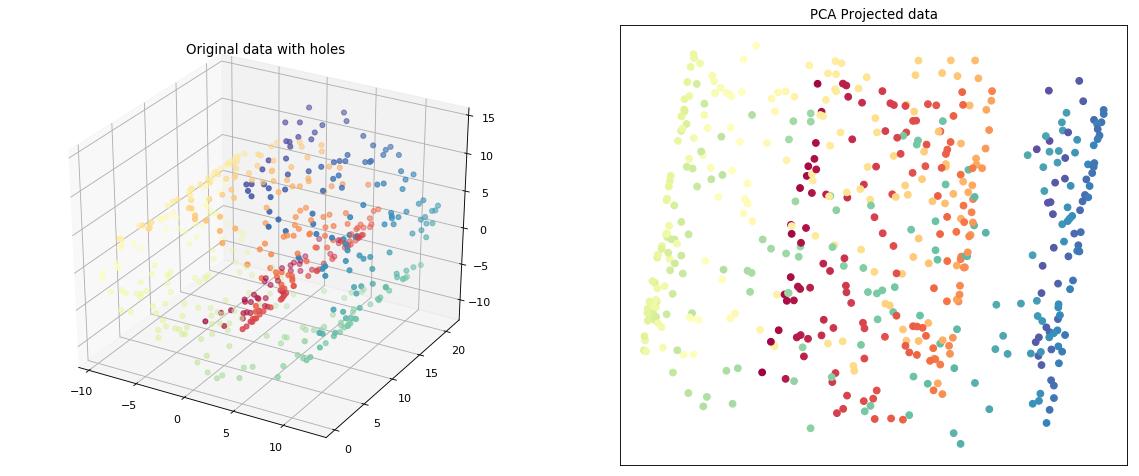

In [104]:
X_pca = getpca(2,X_hole)
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_hole[:, 0], X_hole[:, 1], X_hole[:, 2], c=c_hole, cmap=plt.cm.Spectral)

ax.set_title("Original data with holes")
ax = fig.add_subplot(222)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=c_hole, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('PCA Projected data')
plt.show()